In [ ]:
!pip install tfcausalimpact
from causalimpact import CausalImpact
import pandas as pd
df = pd.read_csv('/work/small/small_train.csv') 
df = df.sort_values(by = 'date')
df['month'] = df.date.apply(lambda x: x[5:7]).values #once I calculated average promotions for a month but then I've actually never used it 

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


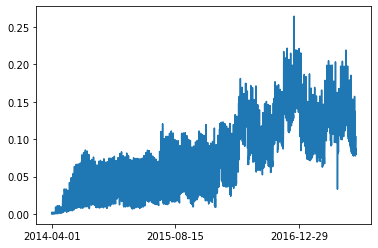

In [ ]:
#plotting the average number of items sold with promotions
fg = df.groupby('date').onpromotion.sum()/df.groupby('date').onpromotion.count()
dic = {'date': fg.index, 'proms': fg.values}
new = pd.DataFrame(dic)
import matplotlib.pyplot as plt
plt.plot(fg.index, fg.values)
plt.xticks(range(0, len(fg)+1, 500))
plt.show()

In [ ]:
#Causal impact on the whole dataset
redo = df.groupby('date').unit_sales.sum()
data = pd.DataFrame({'x': redo.index, 'y': redo.values})
data['x1'] = range(len(data))
data['x2'] = df.groupby('date').onpromotion.sum().values
ci = CausalImpact(data[['y', 'x1', 'x2']], [0, 875], [875+1, 1229], )

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.
Instructions for updating:
Do not call `graph_parents`.
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.
Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


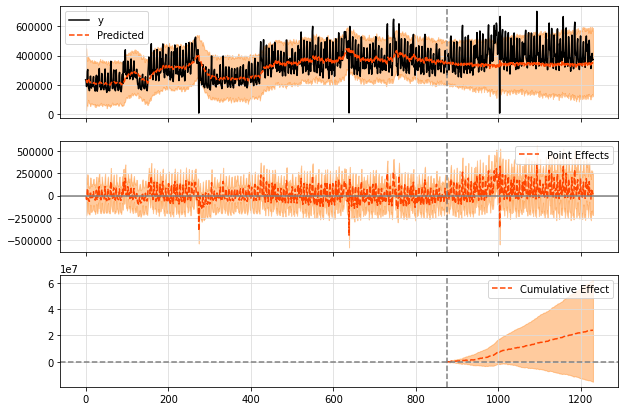

In [ ]:
ci.plot()

In [ ]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    408457.31          144593888.0
Prediction (s.d.)         340732.97 (59401.13)120619472.0 (21028000.21)
95% CI                    [226663.81, 459511.99][80238985.8, 162667249.2]

Absolute effect (s.d.)    67724.34 (59401.13)23974416.0 (21028000.21)
95% CI                    [-51054.68, 181793.51][-18073361.2, 64354902.2]

Relative effect (s.d.)    19.88% (17.43%)    19.88% (17.43%)
95% CI                    [-14.98%, 53.35%]  [-14.98%, 53.35%]

Posterior tail-area probability p: 0.11
Posterior prob. of a causal effect: 89.01%

For more details run the command: print(impact.summary('report'))


In [ ]:
#Adding new params about stores and items to dataset
stores = pd.read_csv('stores.csv')
items = pd.read_csv('items.csv')
df = df.merge(stores[['store_nbr', 'type']], right_on='store_nbr', left_on='store_nbr')
df = df.merge(items[['item_nbr', 'family', 'perishable']], right_on='item_nbr', left_on='item_nbr')

In [ ]:
#Causal impact by shop type

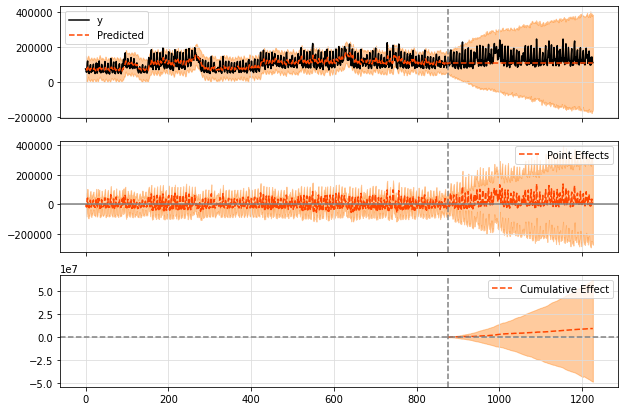

In [ ]:
redo = df[df['type'] == 'A'].groupby('date').unit_sales.sum()
data = pd.DataFrame({'x': redo.index, 'y': redo.values})
data['x1'] = range(len(data))
data['x2'] = df[df['type'] == 'A'].groupby('date').onpromotion.sum().values
ci = CausalImpact(data[['y', 'x1', 'x2']], [0, 875], [875+1, len(data)-1], )
ci.plot()

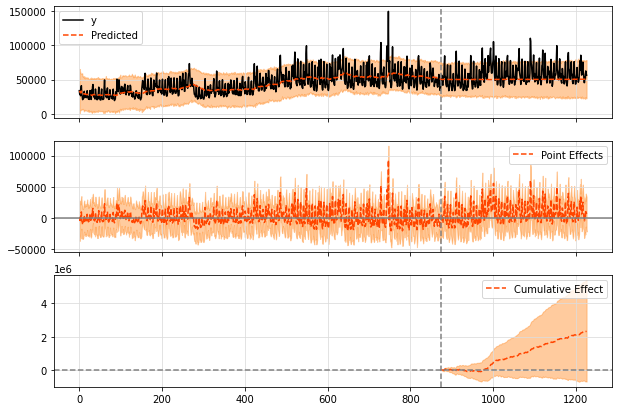

In [ ]:
redo = df[df['type'] == 'B'].groupby('date').unit_sales.sum()
data = pd.DataFrame({'x': redo.index, 'y': redo.values})
data['x1'] = range(len(data))
data['x2'] = df[df['type'] == 'B'].groupby('date').onpromotion.sum().values
ci = CausalImpact(data[['y', 'x1', 'x2']], [0, 875], [875+1, len(data)-1], )
ci.plot()

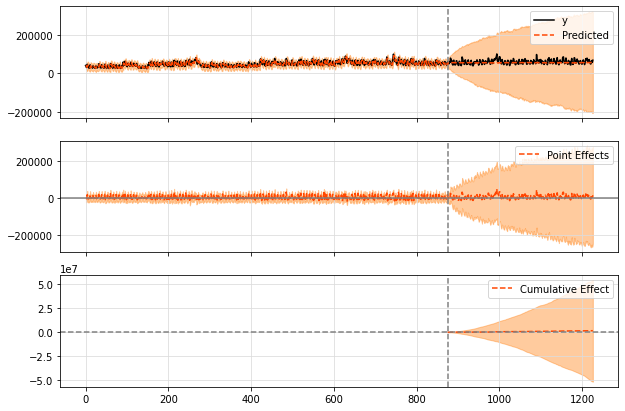

In [ ]:
redo = df[df['type'] == 'C'].groupby('date').unit_sales.sum()
data = pd.DataFrame({'x': redo.index, 'y': redo.values})
data['x1'] = range(len(data))
data['x2'] = df[df['type'] == 'C'].groupby('date').onpromotion.sum().values
ci = CausalImpact(data[['y', 'x1', 'x2']], [0, 875], [875+1, len(data)-1], )
ci.plot()

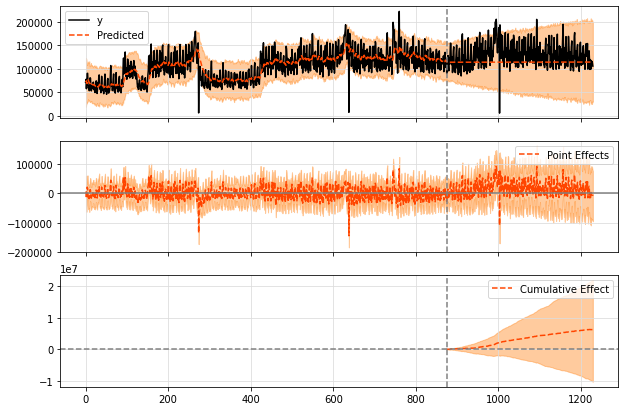

In [ ]:
redo = df[df['type'] == 'D'].groupby('date').unit_sales.sum()
data = pd.DataFrame({'x': redo.index, 'y': redo.values})
data['x1'] = range(len(data))
data['x2'] = df[df['type'] == 'D'].groupby('date').onpromotion.sum().values
ci = CausalImpact(data[['y', 'x1', 'x2']], [0, 875], [875+1, len(data)-1], )
ci.plot()

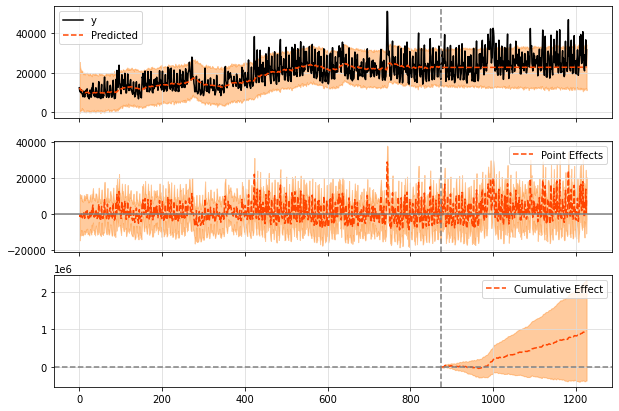

In [ ]:
redo = df[df['type'] == 'E'].groupby('date').unit_sales.sum()
data = pd.DataFrame({'x': redo.index, 'y': redo.values})
data['x1'] = range(len(data))
data['x2'] = df[df['type'] == 'E'].groupby('date').onpromotion.sum().values
ci = CausalImpact(data[['y', 'x1', 'x2']], [0, 875], [875+1, len(data)-1], )
ci.plot()

In [ ]:
#collecting data on long promotion of certain items
from tqdm import tqdm
df = df.sort_values(by = 'date')
dic = {'count':[], 'i':[], 'j':[], 'goods_c':[]}
for i in tqdm(df.item_nbr.unique(), total = len(df.item_nbr.unique())):
    count, goods_c = 0, 0
    prom = df[df.item_nbr == i]
    for j in prom.date.unique():
        if prom[(prom.date == j)].onpromotion.sum()/len(prom[(prom.date == j)]) == 1:
            count += 1
            goods_c += prom[(prom.date == j)].onpromotion.sum()
            if count > 15:
                dic['i'].append(i)
                dic['count'].append(count)
                dic['j'].append(j)
                dic['goods_c'].append(goods_c)
        else: 
            count, goods_c = 0, 0

100%|██████████| 4032/4032 [3:30:20<00:00,  3.13s/it]


In [ ]:
goods = pd.DataFrame(dic)
goods.to_csv('goods_promo.csv', index = False)

In [ ]:
goods = pd.read_csv('goods_promo.csv')
goods = goods.sort_values(by = 'count', ascending = False)

In [ ]:
#Causal impact on Category sales of one item with longest promotion
dic = {'date': df[(df.item_nbr == 1456952)].groupby('date').unit_sales.sum().index, 'value': list(df[(df.item_nbr == 1456952)].groupby('date').unit_sales.sum().values)}
count = 0
for i in df[(df.family == 'HOME CARE') & (df.item_nbr != 1456952)].groupby('date').onpromotion.sum().index:
    if i not in dic['date']:
        dic['value'].insert(count, 0)
    count+=1

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.
Instructions for updating:
Do not call `graph_parents`.
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.
Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


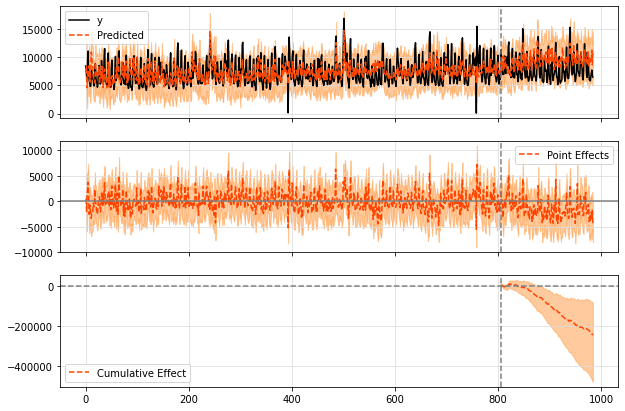

In [ ]:
redo = df[(df.family == 'HOME CARE') & (df.item_nbr != 1456952)].groupby('date').unit_sales.sum()
data = pd.DataFrame({'x': redo.index, 'y': redo.values})
data['x1'] = range(len(data))
data['x2'] = df[(df.family == 'HOME CARE') & (df.item_nbr != 1456952)].groupby('date').onpromotion.sum().values
data['x3'] = dic['value']
ci = CausalImpact(data[['y', 'x1', 'x2', 'x3']], [0, 805], [805+1, len(data)-1], )
ci.plot()

In [ ]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    8028.05            1437021.0
Prediction (s.d.)         9401.16 (548.34)   1682807.0 (98152.73)
95% CI                    [8527.67, 10677.13][1526453.77, 1911205.5]

Absolute effect (s.d.)    -1373.11 (548.34)  -245786.0 (98152.73)
95% CI                    [-2649.08, -499.62][-474184.5, -89432.77]

Relative effect (s.d.)    -14.61% (5.83%)    -14.61% (5.83%)
95% CI                    [-28.18%, -5.31%]  [-28.18%, -5.31%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [ ]:
#Cleaning goods from unneccesary rows 
idx = []
for n in goods.i.unique():
    prom = goods[goods.i == n]
    idx += list(prom[prom['count'] != prom['count'].max()].index)
goods = goods.drop(index = idx)
goods = goods[goods['count']*2 < goods.goods_c]
goods.sort_values(by = 'count', ascending = False)

,count,i,j,goods_c
13275,138,1456952,2017-07-27,708
4607,111,1175993,2016-10-30,229
15483,108,1909411,2017-07-09,689
13850,92,1360010,2017-07-13,607
13551,85,1366212,2017-07-13,231
...,...,...,...,...
1662,16,1239817,2017-07-05,199
2132,16,870546,2016-12-07,181
1123,16,1239812,2017-07-05,184
2236,16,1146783,2016-05-12,181


In [ ]:
#creating function for testing every category sales of item with long promotion
import numpy as np
def check(x):
    this = df[(df.item_nbr == x)]
    prom = this.groupby('date').unit_sales.sum()
    dic = {'date': prom.index, 'value': list(prom.values)}
    count = 0
    for i in df[(df.family == this.family.iloc[0]) & (df.item_nbr != x)].groupby('date').onpromotion.sum().index:
        if i not in dic['date']:
            dic['value'].insert(count, 0)
        count+=1
    redo = df[(df.family == this.family.iloc[0]) & (df.item_nbr != x)].groupby('date').unit_sales.sum()
    data = pd.DataFrame({'x': redo.index, 'y': redo.values})
    data['x1'] = range(len(data))
    data['x2'] = df[(df.family == this.family.iloc[0]) & (df.item_nbr != x)].groupby('date').onpromotion.sum().values
    data['x3'] = dic['value']
    lst = data.sort_values(by = 'x').x.unique()
    ids = np.where(lst == goods[goods.i == x].j.iloc[0])[0][0]
    start = ids - goods[goods.i == x]['count'].iloc[0]
    ci = CausalImpact(data[['y', 'x1', 'x2', 'x3']], [0, int(start)], [int(start)+1, int(ids)], )
    effect = ci.summary_data.average.iloc[7]
    pval = ci.p_value
    return effect, pval

In [ ]:
#saving the results
from tqdm import tqdm
dic = {'effect':[], 'pval':[]}
for n in tqdm(range(0, len(goods))):
    effect, pval = check(goods.i.iloc[n])
    dic['effect'].append(effect)
    dic['pval'].append(pval)

100%|██████████| 275/275 [8:16:13<00:00, 108.27s/it]


In [ ]:
pd.DataFrame(dic).to_pickle('results.pkl')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0b06fa9-9dc8-48e0-ad5a-d1d1aa37a190' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>